# Analysis of Building America 2015 Study

In [40]:
import pandas as pd
import numpy as np
# import matplotlib pyplot commands
from matplotlib.pyplot import *
from IPython.display import Image, Markdown
 
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

In [41]:
rcParams['figure.figsize']= (10, 6)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

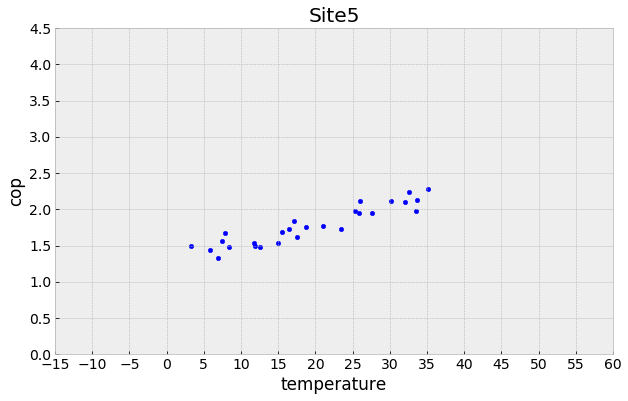

In [42]:
sheet_names = ('Site1', 'Site2', 'Site4', 'Site5', 'Site8', 'Site9', 'Site10')
ix = 3
dfp = pd.read_excel('COP_vs_temp_plots.xlsx', sheet_name=sheet_names[ix])
dfp.plot(x='temperature', y='cop', kind='scatter')
xlim(-15, 60)
ylim(0, 4.5)
title(sheet_names[ix])
gca().set_xticks(np.arange(-15, 61, 5));

In [43]:
def bin_averages(df, bin_width = 5.0):
    """For DataFrame df, calculate average temperatures and COPs for bins
    of outdoor temperature of width 'bin_width' deg F.  Return a DataFrame
    with the averaged values.
    """
    dfc = df.copy()
    # calculate the bin for each row
    dfc['temp_bin'] = dfc['temperature'] // bin_width
    
    # average by bins
    dfa = dfc.groupby('temp_bin').mean()
    dfa = dfa[['temperature', 'cop']]
    return dfa

In [58]:
# Determines width of averaging bins
BIN_WIDTH = 10./3.

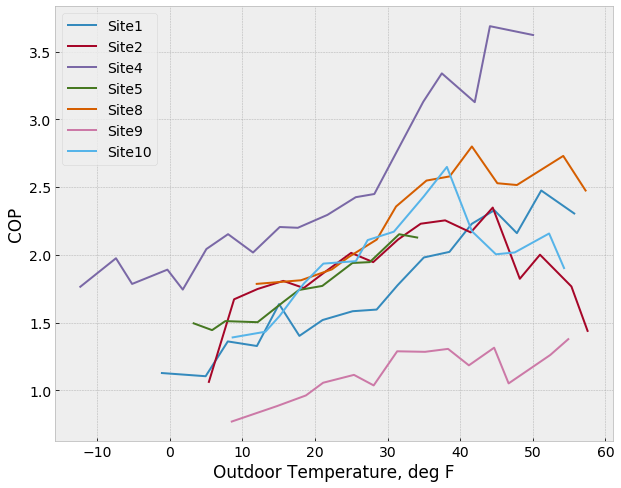

In [59]:
# Plot all the curves, but also create one DataFrame containing
# all the binned data
figure(figsize=(10,8))
df_all = None
for sht_nm in sheet_names:
    dfp = pd.read_excel('COP_vs_temp_plots.xlsx', sheet_name=sht_nm)
    dfa = bin_averages(dfp, bin_width=BIN_WIDTH)
    dfa.reset_index(inplace=True)
    dfa.drop(columns=['temp_bin'], inplace=True)
    dfa['site'] = sht_nm
    plot(dfa.temperature, dfa.cop, label=sht_nm)
    if df_all is None:
        df_all = dfa
    else:
        df_all = pd.concat([df_all, dfa])
xlabel('Outdoor Temperature, deg F')
ylabel('COP')
legend()

In [60]:
df_all.head()

,temperature,cop,site
0,-1.085000,1.127000,Site1
1,4.939500,1.103500,Site1
2,7.992500,1.360500,Site1
3,12.000833,1.326717,Site1
4,15.051429,1.636143,Site1


There is good data coverage from 10 - 50 deg F outdoors.  Except, Site 5 only has data up through about 35 deg F.  So, we will drop Site 5. 

In [61]:
# Drop Site 5 and only look at data between 10 and 50 deg F
df_all.query("site != 'Site5' and temperature >= 10 and temperature <= 50", inplace=True)

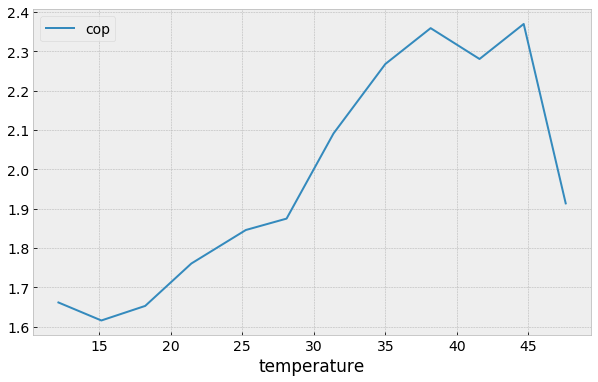

In [62]:
df_all_avg = bin_averages(df_all, bin_width=BIN_WIDTH)
df_all_avg.plot(x='temperature', y='cop')

In [63]:
df_all_avg

,temperature,cop
temp_bin,,
3.0,12.142346,1.661867
4.0,15.143395,1.616161
5.0,18.208667,1.653135
6.0,21.432935,1.760781
7.0,25.244642,1.845937
8.0,28.091025,1.874850
9.0,31.372922,2.091032
10.0,34.995885,2.267464
11.0,38.163270,2.358543


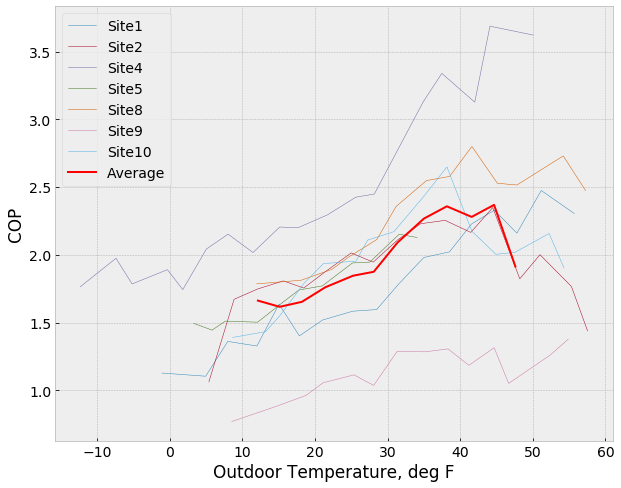

In [64]:
# Redo the plot showing all the lines, but superimpose this line on it
figure(figsize=(10,8))
df_all = None
for sht_nm in sheet_names:
    dfp = pd.read_excel('COP_vs_temp_plots.xlsx', sheet_name=sht_nm)
    dfa = bin_averages(dfp, bin_width=BIN_WIDTH)
    dfa.reset_index(inplace=True)
    dfa.drop(columns=['temp_bin'], inplace=True)
    dfa['site'] = sht_nm
    plot(dfa.temperature, dfa.cop, label=sht_nm, linewidth=0.5)
    if df_all is None:
        df_all = dfa
    else:
        df_all = pd.concat([df_all, dfa])
plot(df_all_avg.temperature, df_all_avg.cop, 'r-', linewidth=2.0, label='Average')
xlabel('Outdoor Temperature, deg F')
ylabel('COP')
legend()

In [67]:
df_all_avg['source'] = 'Steven Winter'
df_all_avg['field_study'] = True
df_all_avg['hspf'] = 12   # Estimate at this point
df_all_avg.to_pickle('temp_cop_swinter.pkl')